# 导入数据

In [78]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import math

In [105]:
data_file = '大黑楼逐日.csv'
sensor_code='210200D11103009'

In [106]:
data_list_tmp=[]
with open(data_file, 'r', encoding='UTF-8') as f:
    reader = csv.reader(f)
    for row in reader:
        if row[0]==sensor_code:
            data_list_tmp.append([datetime(2019,int(row[4]),int(row[5]),0,0),float(row[3])])
start_date=data_list_tmp[0][0]
end_date=data_list_tmp[-1][0]
date_list=pd.date_range(start=start_date,end=end_date).tolist()
data_list=[]
j=0
for i in date_list:
    if data_list_tmp[j][0]==i:
        data_list.append([i,data_list_tmp[j][1]])
        j=j+1
    else:
        data_list.append([i,math.nan])
while math.isnan(data_list[0][1]):
    del(data_list[0])
while math.isnan(data_list[-1][1]):
    del(data_list[-1])
data_set=np.array(data_list)
data_series=pd.Series(data_set[:,1],index=data_set[:,0]).astype(float)

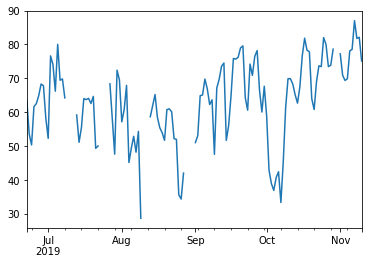

In [107]:
data_series.plot()

# 填补缺失值

In [108]:
data_series=data_series.astype(float).interpolate()

In [109]:
data_series

2019-06-22    63.572
2019-06-23    53.556
2019-06-24    50.338
2019-06-25    61.640
2019-06-26    62.526
               ...  
2019-11-06    78.568
2019-11-07    87.028
2019-11-08    81.768
2019-11-09    82.118
2019-11-10    75.104
Length: 142, dtype: float64

# 划分测试集

In [110]:
train_proportion=0.9
train_length=int(len(data_series)*train_proportion)
test_length=len(data_series)-train_length
data_train=data_series[0:train_length]
data_test=data_series[train_length:]

In [111]:
data_train

2019-06-22    63.572
2019-06-23    53.556
2019-06-24    50.338
2019-06-25    61.640
2019-06-26    62.526
               ...  
2019-10-22    69.018
2019-10-23    73.686
2019-10-24    73.456
2019-10-25    82.024
2019-10-26    79.990
Length: 127, dtype: float64

In [112]:
data_test

2019-10-27    73.462
2019-10-28    73.860
2019-10-29    78.608
2019-10-30    78.146
2019-10-31    77.684
2019-11-01    77.222
2019-11-02    70.908
2019-11-03    69.364
2019-11-04    69.860
2019-11-05    78.078
2019-11-06    78.568
2019-11-07    87.028
2019-11-08    81.768
2019-11-09    82.118
2019-11-10    75.104
dtype: float64

# 数据格式转换

In [113]:
y_train=data_train.tolist()[7:]
x_train=np.transpose([data_train.shift(1).tolist(),data_train.shift(2).tolist(),data_train.shift(3).tolist(),data_train.shift(4).tolist(),data_train.shift(5).tolist(),data_train.shift(6).tolist(),data_train.shift(7).tolist()])[7:]

# 模型建立

In [114]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)
print(model.intercept_)

[ 0.80284769 -0.14541745  0.19741544 -0.1961345   0.10557491 -0.03800664
  0.06982325]
12.468701234202598


In [115]:
y_test=[]
x_test=data_train[-7:].tolist()
for i in range(test_length):
    pred=model.predict(np.array(x_test[-7:]).reshape(1,-1))[0]
    y_test.append(pred)
    x_test.append(pred)

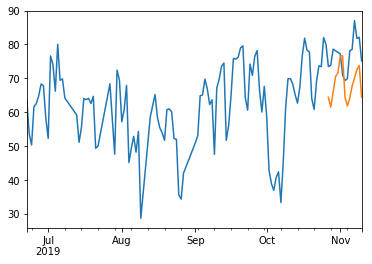

In [116]:
plt.autoscale(axis='x', tight=True)
data_series.plot()
pred_data=pd.Series(y_test,index=data_test.index)
pred_data.plot()
plt.show()

In [117]:
accuracy=1-(abs(pred_data-data_series)/data_series)[train_length:].mean()
print(accuracy)

0.88180154521793
